# Analyzing Ice-Cream Sales

In [1]:
import matplotlib.pyplot as plt

This example introduces NumPy, another popular library for data analysis. NumPy allows us to create arrays efficiently. In this notebook we'll use it to generate arrays of random numbers and to find the best fit line for our data points.

In [2]:
import numpy as np

## Data Generation

Setting a seed value means that we'll always get the same sequence of random numbers. We do this for reproducibility of the results.

In [3]:
np.random.seed(42)

In [4]:
# Use NumPy to generate 30 random temperature values between 15°C and 35°C
temperatures = np.random.uniform(15, 35, 30)

temperatures

array([22.49080238, 34.01428613, 29.63987884, 26.97316968, 18.12037281,
       18.11989041, 16.16167224, 32.32352292, 27.02230023, 29.16145156,
       15.41168989, 34.39819704, 31.64885282, 19.24678221, 18.63649934,
       18.6680902 , 21.08484486, 25.49512863, 23.63890037, 20.8245828 ,
       27.23705789, 17.78987721, 20.84289297, 22.32723687, 24.12139968,
       30.70351923, 18.99347564, 25.28468877, 26.84829138, 15.92900825])

In [5]:
# Ice cream sales: assume a linear relation with some noise
sales = 3 * temperatures + np.random.uniform(-10, 10, 30)

sales

array([ 69.62330417,  95.45334086,  80.22066837,  89.8972198 ,
        63.67375909,  60.52761818,  44.57729211,  88.92401103,
        84.75156123,  86.28740454,  38.67583435, 103.09812933,
        85.63432887,  65.92675468,  51.08509766,  59.25471628,
        59.4887561 ,  76.88674632,  71.85090671,  56.17083752,
        91.10286624,  58.87228811,  71.31865774,  74.87825761,
        74.32219863, 100.54804238,  48.75027697,  69.77372355,
        71.44941991,  44.29363138])

## Data Visualization

The gradient is 2.812808664930487.
The y-intercept is 4.377987536335678.


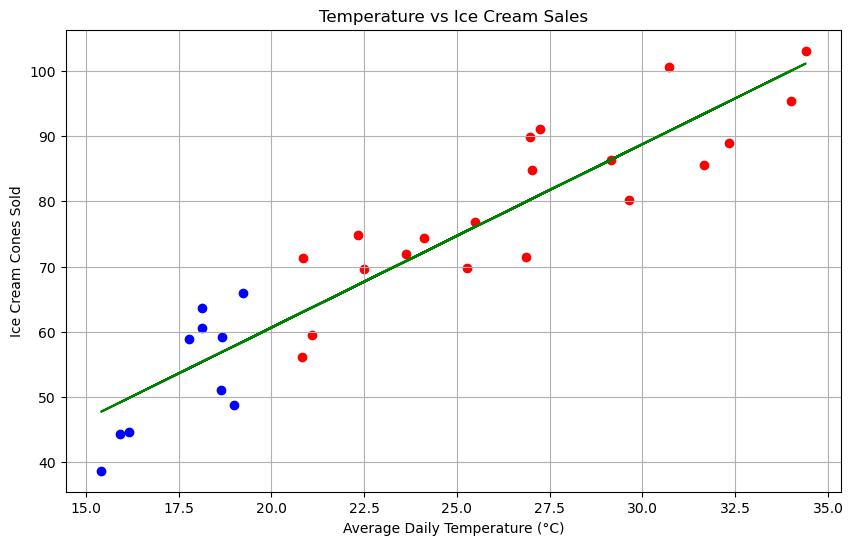

In [6]:
plt.figure(figsize=(10, 6))

# Add points one at a time, differentiating between cooler and warmer days with colour
for temp, sale in zip(temperatures, sales):
    plt.scatter(x=temp,
                y=sale,
                color='blue' if temp < 20 else 'red')

# Calculate the gradient (m) and the y-intercept (c) of the best fit line.
# A degree-1 polynomial is a linear function of the form c0 + c1x, or in other
# words, a straight line. We want a straight line, so we set deg=1.
m, c = np.polyfit(temperatures, sales, deg=1)
print(f"The gradient is {m}.")
print(f"The y-intercept is {c}.")

# Add a trend line
plt.plot(temperatures, m * temperatures + c, color='green')

# Customisation
plt.title("Temperature vs Ice Cream Sales")
plt.xlabel("Average Daily Temperature (°C)")
plt.ylabel("Ice Cream Cones Sold")
plt.grid(True)

# Display the plot
plt.show()

### Analysis
The green line represents the trend. As the temperature increases, ice cream sales also tend to increase. This trend is expected as people are more likely to buy ice cream on warmer days. There is some variability in sales, which could be due to other factors not considered in this simple analysis.

## Updated code

The code above uses np.polyfit. This is now considered 'old-style', but you'll still see it in example code. The code below creates the same graph, but it has been updated to use the Polynomial API. You don't have to worry about this. I've just included the updated code for completeness.

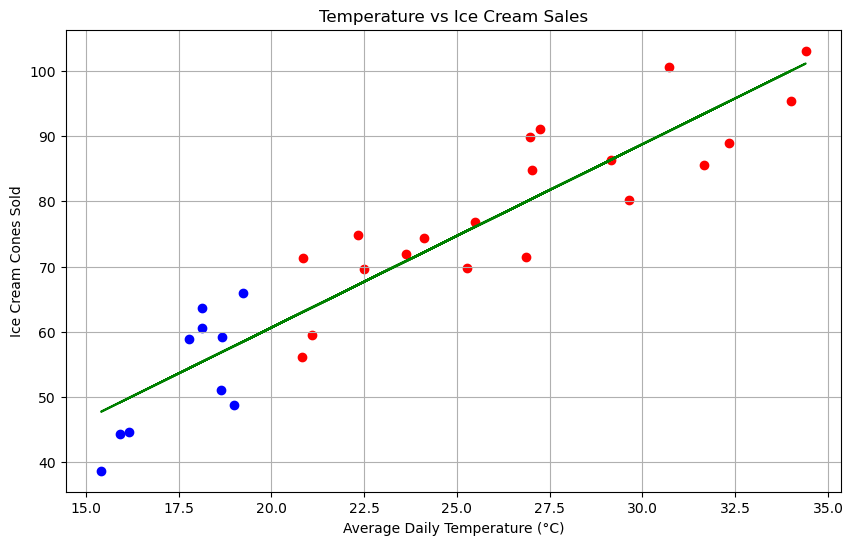

In [7]:
from numpy.polynomial import Polynomial

plt.figure(figsize=(10, 6))

# Plot points, colouring based on temperature
for temp, sale in zip(temperatures, sales):
    plt.scatter(x=temp,
                y=sale,
                color='blue' if temp < 20 else 'red')

# Fit a linear polynomial using the new Polynomial API.
# The return value from Polynomial.fit, which we assign to p is a
# Polynomial object.
p = Polynomial.fit(temperatures, sales, deg=1)

# Convert the fitted polynomial to the standard power basis.
# The return value from p.convert, which we assign to p_converted,
# is also a Polynomial object, but now giving us the c0 + c1x form
# that we want in this case.
p_converted = p.convert()

# Plot the fitted line
# p_converted is callable, we give it x values and it returns
# the corresponding y values on the best fit line.
plt.plot(temperatures, p_converted(temperatures), color='green')

# Customisation
plt.title("Temperature vs Ice Cream Sales")
plt.xlabel("Average Daily Temperature (°C)")
plt.ylabel("Ice Cream Cones Sold")
plt.grid(True)

# Display the plot
plt.show()